In [4]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'
# Daten einlesen
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Nur die Spalte 'calls' extrahieren und sicherstellen, dass sie numerisch ist
data['calls'] = pd.to_numeric(data['calls'], errors='coerce')
data = data.asfreq('D')
# Fehlende Werte überprüfen und gegebenenfalls entfernen oder auffüllen
if data['calls'].isnull().any():
    data = data.dropna(subset=['calls'])

# Beispielparameter (müssen je nach Daten angepasst werden)
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 365 # Saisonalität für tägliche Daten, monatlicher Zyklus

# Modell anpassen
model = SARIMAX(data['calls'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = model.fit(disp=False)

# Prognose für den nächsten Monat
forecast_steps = 30  # Anzahl der Tage für die Prognose
forecast = sarima_fit.get_forecast(steps=forecast_steps)

# Prognosewerte
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotten der Ergebnisse
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['calls'], label='Historische Daten')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_values, label='Prognose', color='red')
plt.fill_between(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:],
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Prognose der Anrufe')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.legend()
plt.show()

/Users/frederic/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np

# Pfad zur CSV-Datei
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'

# Daten einlesen
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Sicherstellen, dass die 'date'-Spalte als Index eine Frequenz hat
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Nur die Spalte 'calls' extrahieren und sicherstellen, dass sie numerisch ist
data['calls'] = pd.to_numeric(data['calls'], errors='coerce')

# Fehlende Werte überprüfen und gegebenenfalls entfernen oder auffüllen
if data['calls'].isnull().any():
    data = data.dropna(subset=['calls'])

# Beispielparameter (je nach Daten anpassen)
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 365  # Saisonalität für tägliche Daten, monatlicher Zyklus

# Funktion zur Erstellung der Prognose
def make_forecast(data, start_date, forecast_steps=30):
    # Adjust model parameters if necessary
    model = SARIMAX(data['calls'], order=(p, d, q), seasonal_order=(P, D, Q, s))
    sarima_fit = model.fit(disp=False, maxiter=1000)  # Increase number of iterations
    forecast = sarima_fit.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    return forecast_values, forecast_ci

# Prognosen für jeden 15. Tag des Monats erstellen
forecast_results = []
for date in data.index:
    print("x")
    if date.day == 15:
        if len(data[:date]) >= max(p, d, q, P, D, Q) + s:
            forecast_values, forecast_ci = make_forecast(data[:date], start_date=date)
            forecast_dates = pd.date_range(start=date, periods=len(forecast_values), freq='D')
            forecast_df = pd.DataFrame({'forecast': forecast_values, 
                                        'lower_ci': forecast_ci.iloc[:, 0], 
                                        'upper_ci': forecast_ci.iloc[:, 1]}, 
                                        index=forecast_dates)
            forecast_results.append(forecast_df)

# Alle Prognosen zusammenführen
if forecast_results:
    all_forecasts = pd.concat(forecast_results)

    # Plotten der Ergebnisse
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['calls'], label='Historische Daten')
    for forecast_df in forecast_results:
        plt.plot(forecast_df.index, forecast_df['forecast'], label='Prognose', color='red')
        plt.fill_between(forecast_df.index,
                         forecast_df['lower_ci'],
                         forecast_df['upper_ci'], color='red', alpha=0.3)
    plt.title('SARIMA Prognose der Anrufe')
    plt.xlabel('Datum')
    plt.ylabel('Anzahl der Anrufe')
    plt.legend()
    plt.show()
else:
    print("Keine Prognosen erstellt, da nicht genügend Daten vorhanden sind.")


Epoch 1/20
24/24 [==============================] - 3s 13ms/step - loss: 0.0939
Epoch 2/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0272
Epoch 3/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0249
Epoch 4/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0246
Epoch 5/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0244
Epoch 6/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0249
Epoch 7/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0245
Epoch 8/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 9/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 10/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0242
Epoch 11/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0241
Epoch 12/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0241
Epoch 13/20
24/24 [==================

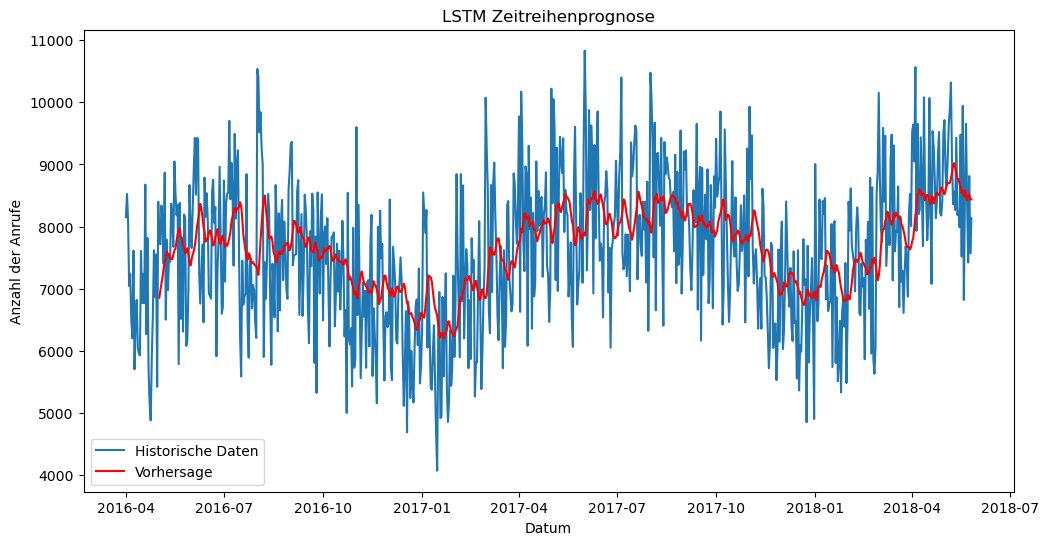

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Daten einlesen
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Datenvorbereitung
data = data.asfreq('D')
data['calls'] = pd.to_numeric(data['calls'], errors='coerce').fillna(0)

# Feature Engineering
values = data['calls'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# Erstellen von Datensätzen für LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # Zeitfenster für LSTM
X, y = create_dataset(scaled_values, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Modell erstellen
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Vorhersage machen
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))
plt.plot(data.index, values, label='Historische Daten')
plt.plot(data.index[time_step+1:], predictions, label='Vorhersage', color='red')
plt.title('LSTM Zeitreihenprognose')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.legend()
plt.show()


Epoch 1/20
24/24 [==============================] - 3s 14ms/step - loss: 0.0743
Epoch 2/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0310
Epoch 3/20
24/24 [==============================] - 0s 14ms/step - loss: 0.0293
Epoch 4/20
24/24 [==============================] - 0s 14ms/step - loss: 0.0273
Epoch 5/20
24/24 [==============================] - 0s 14ms/step - loss: 0.0276
Epoch 6/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0261
Epoch 7/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0276
Epoch 8/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0269
Epoch 9/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0258
Epoch 10/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0261
Epoch 11/20
24/24 [==============================] - 0s 16ms/step - loss: 0.0261
Epoch 12/20
24/24 [==============================] - 0s 16ms/step - loss: 0.0276
Epoch 13/20
24/24 [==================

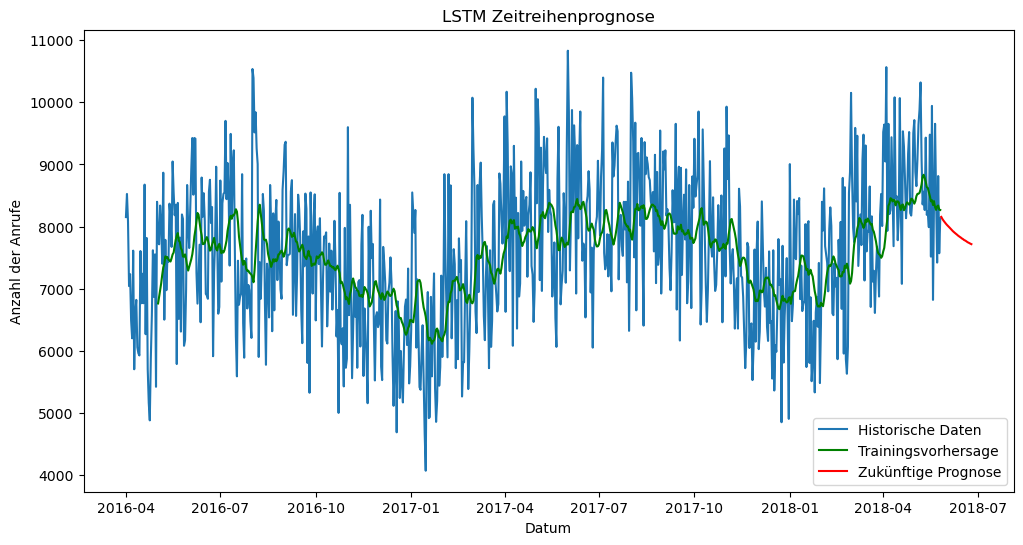

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Daten einlesen
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Datenvorbereitung
data = data.asfreq('D')
data['calls'] = pd.to_numeric(data['calls'], errors='coerce').fillna(0)

# Feature Engineering
values = data['calls'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# Erstellen von Datensätzen für LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Hyperparameter
time_step = 30  # Zeitfenster für LSTM
n_neurons = 50  # Anzahl der LSTM-Neuronen
n_layers = 2  # Anzahl der LSTM-Schichten
dropout_rate = 0.2  # Dropout-Rate
batch_size = 32  # Batch-Größe
epochs = 20  # Anzahl der Epochen
learning_rate = 0.001  # Lernrate

X, y = create_dataset(scaled_values, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Modell erstellen
model = Sequential()
for _ in range(n_layers - 1):
    model.add(LSTM(n_neurons, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(dropout_rate))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dropout(dropout_rate))
model.add(Dense(1))

# Optimizer mit angegebener Lernrate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Modell trainieren
model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)

# Vorhersagen für Trainingsdaten machen
train_predictions = model.predict(X)
train_predictions = scaler.inverse_transform(train_predictions)

# Zukünftige Vorhersagen machen
future_steps = 30  # Anzahl der zukünftigen Tage für die Prognose
last_values = scaled_values[-time_step:]  # Letzte Zeitfenstergröße für die Vorhersage
future_predictions = []

for _ in range(future_steps):
    last_values_reshaped = last_values.reshape((1, time_step, 1))
    next_pred = model.predict(last_values_reshaped)
    future_predictions.append(next_pred[0, 0])
    last_values = np.append(last_values[1:], next_pred, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))
plt.plot(data.index, values, label='Historische Daten')
plt.plot(data.index[time_step+1:], train_predictions, label='Trainingsvorhersage', color='green')
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_steps, freq='D')
plt.plot(future_dates, future_predictions, label='Zukünftige Prognose', color='red')
plt.title('LSTM Zeitreihenprognose')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.legend()
plt.show()


Epoch 1/20
24/24 [==============================] - 3s 21ms/step - loss: 0.0668
Epoch 2/20
24/24 [==============================] - 0s 19ms/step - loss: 0.0279
Epoch 3/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0287
Epoch 4/20
24/24 [==============================] - 0s 19ms/step - loss: 0.0280
Epoch 5/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0276
Epoch 6/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0271
Epoch 7/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0269
Epoch 8/20
24/24 [==============================] - 0s 19ms/step - loss: 0.0279
Epoch 9/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0267
Epoch 10/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0272
Epoch 11/20
24/24 [==============================] - 0s 20ms/step - loss: 0.0276
Epoch 12/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0269
Epoch 13/20
24/24 [==================

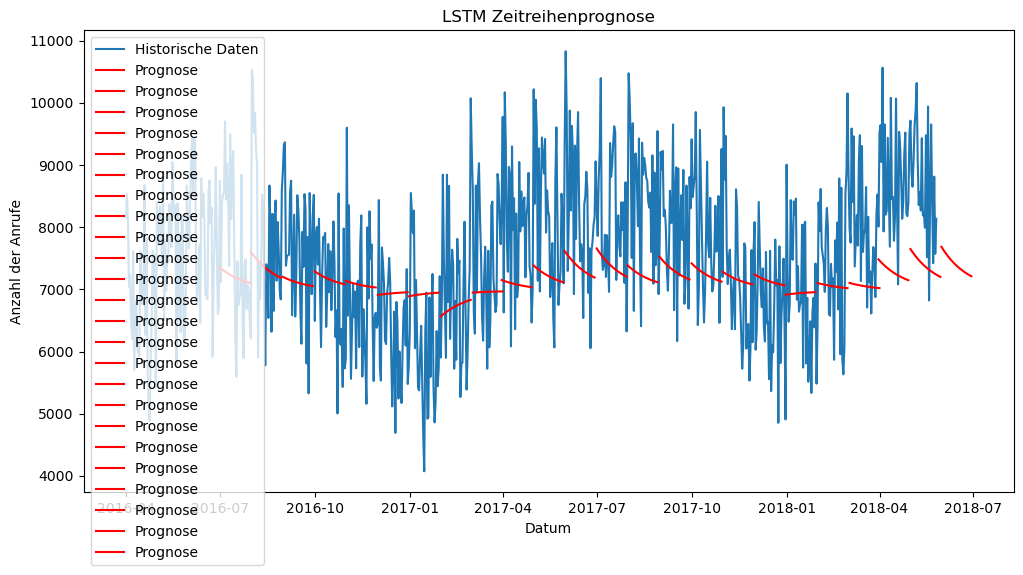

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Daten einlesen
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Datenvorbereitung
data = data.asfreq('D')
data['calls'] = pd.to_numeric(data['calls'], errors='coerce').fillna(0)

# Feature Engineering
values = data['calls'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# Erstellen von Datensätzen für LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Hyperparameter
time_step = 45  # Zeitfenster für LSTM
n_neurons = 50  # Anzahl der LSTM-Neuronen
n_layers = 2  # Anzahl der LSTM-Schichten
dropout_rate = 0.2  # Dropout-Rate
batch_size = 32  # Batch-Größe
epochs = 20  # Anzahl der Epochen
learning_rate = 0.001  # Lernrate

X, y = create_dataset(scaled_values, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Modell erstellen
model = Sequential()
for _ in range(n_layers - 1):
    model.add(LSTM(n_neurons, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(dropout_rate))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dropout(dropout_rate))
model.add(Dense(1))

# Optimizer mit angegebener Lernrate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Modell trainieren
model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)

# Prognosen für jeden 15. Tag des Monats erstellen
forecast_results = []
for date in data.index:
    if date.day == 15:
        end_idx = data.index.get_loc(date)
        
        # Sicherstellen, dass genügend Daten vorhanden sind
        if end_idx >= time_step:
            last_values = scaled_values[end_idx - time_step:end_idx]
            future_predictions = []

            # 15 Tage in die Zukunft springen
            for _ in range(15):
                last_values_reshaped = last_values.reshape((1, time_step, 1))
                next_pred = model.predict(last_values_reshaped)
                last_values = np.append(last_values[1:], next_pred, axis=0)

            # 30 Tage Prognose ab dem 15. Tag in die Zukunft
            for _ in range(30):
                last_values_reshaped = last_values.reshape((1, time_step, 1))
                next_pred = model.predict(last_values_reshaped)
                future_predictions.append(next_pred[0, 0])
                last_values = np.append(last_values[1:], next_pred, axis=0)

            future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
            future_dates = pd.date_range(start=date + pd.DateOffset(days=16), periods=30, freq='D')

            forecast_df = pd.DataFrame({'forecast': future_predictions.flatten()}, index=future_dates)
            forecast_results.append(forecast_df)

# Alle Prognosen zusammenführen
all_forecasts = pd.concat(forecast_results)

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))
plt.plot(data.index, values, label='Historische Daten')
for forecast_df in forecast_results:
    plt.plot(forecast_df.index, forecast_df['forecast'], label='Prognose', color='red')
plt.title('LSTM Zeitreihenprognose')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Daten einlesen
file_path = '/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Datenvorbereitung
data = data.asfreq('D')
data['calls'] = pd.to_numeric(data['calls'], errors='coerce').fillna(0)

# Feature Engineering
values = data['calls'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# Erstellen von Datensätzen für LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Hyperparameter
time_step = 45  # Zeitfenster für LSTM
n_neurons = 50  # Anzahl der LSTM-Neuronen
n_layers = 2  # Anzahl der LSTM-Schichten
dropout_rate = 0.2  # Dropout-Rate
batch_size = 32  # Batch-Größe
epochs = 20  # Anzahl der Epochen
learning_rate = 0.001  # Lernrate

X, y = create_dataset(scaled_values, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Modell erstellen
model = Sequential()
for _ in range(n_layers - 1):
    model.add(LSTM(n_neurons, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(dropout_rate))
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dropout(dropout_rate))
model.add(Dense(1))

# Optimizer mit angegebener Lernrate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Modell trainieren
model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1)

# Prognosen für die nächsten 46 Tage erstellen
forecast_results = []
dates = data.index

for date in dates:
    end_idx = data.index.get_loc(date)
    
    # Sicherstellen, dass genügend Daten vorhanden sind
    if end_idx >= time_step:
        last_values = scaled_values[end_idx - time_step:end_idx]
        future_predictions = []

        # 46 Tage in die Zukunft springen
        for _ in range(46):
            last_values_reshaped = last_values.reshape((1, time_step, 1))
            next_pred = model.predict(last_values_reshaped)
            future_predictions.append(next_pred[0, 0])
            last_values = np.append(last_values[1:], next_pred, axis=0)

        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
        future_dates = pd.date_range(start=date + pd.DateOffset(days=1), periods=46, freq='D')

        forecast_df = pd.DataFrame({'forecast': future_predictions.flatten()}, index=future_dates)
        forecast_results.append(forecast_df)

# Alle Prognosen zusammenführen
all_forecasts = pd.concat(forecast_results)

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))
plt.plot(data.index, values, label='Historische Daten')
plt.plot(all_forecasts.index, all_forecasts['forecast'], label='Prognose', color='red')
plt.title('LSTM Zeitreihenprognose')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.legend()
plt.show()


Epoch 1/20
24/24 [==============================] - 4s 18ms/step - loss: 0.0658
Epoch 2/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0291
Epoch 3/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0281
Epoch 4/20
24/24 [==============================] - 0s 19ms/step - loss: 0.0280
Epoch 5/20
24/24 [==============================] - 0s 19ms/step - loss: 0.0285
Epoch 6/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0275
Epoch 7/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0269
Epoch 8/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0271
Epoch 9/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0273
Epoch 10/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0286
Epoch 11/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0276
Epoch 12/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0276
Epoch 13/20
24/24 [==================